<a href="https://colab.research.google.com/github/Thonyta17/Econ-5200/blob/main/%5BLab_5%5D_Monte_Carlo_Engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
np.random.randint(9999,99999)

14595

64796

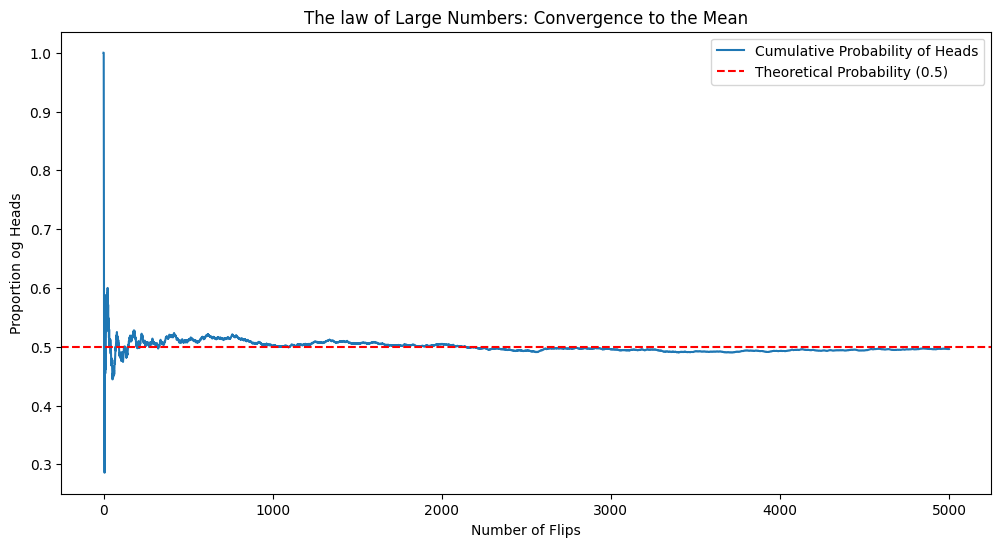

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_law_of_large_numbers(n_flips):
  #Simulate n_flips of a fair coin (0 or 1)
  flips = np.random.choice([0,1], size=n_flips)

  # Calculate cumulative average
  # cumsum adds them up sequentially
  # Divide by range(1, n+1) to get average at each step
  cumulative_averages = np.cumsum(flips)/np.arange(1, n_flips +1)

  #visualization
  plt.figure(figsize=(12,6))
  plt.plot(cumulative_averages, label='Cumulative Probability of Heads')
  plt.axhline(0.5,color='red', linestyle='--', label='Theoretical Probability (0.5)')
  plt.title('The law of Large Numbers: Convergence to the Mean')
  plt.xlabel('Number of Flips')
  plt.ylabel('Proportion og Heads')
  plt.legend()
  plt.show()

#Run the simulation
simulate_law_of_large_numbers(5000)





In [ ]:
def monty_hall_sim(n_games):
  switch_wins=0
  stay_wins=0

  for _ in range(n_games):
      doors = [0,1,2]
      prize = np.random.choice(doors)
      choice = np.random.choice(doors)

      # Host opens a door
      # Host cannot open 'prize' and cannot open 'choice'
      openable_doors = [d for d in doors if d != prize and d != choice]
      host_opens = np.random.choice(openable_doors)

      # Strategy: Stay
      if choice ==prize:
          stay_wins += 1

      #Strategy: Switch
      # The switch choice is the door that is not 'choice' and not 'host_opens'
      switch_choice = [d for d in doors if d != choice and d != host_opens]
      if switch_choice[0] == prize:
        switch_wins += 1

  print(f"Win Rate (Stay): {stay_wins/n_games: .2%}")
  print(f"Win Rate (Switch): {switch_wins/n_games: .2%}")

monty_hall_sim(10000)

Win Rate (Stay):  32.96%
Win Rate (Switch):  67.04%


Probability of Revenue Decline: 17.09%
95% Value at Risk (Worst Case): $9,623,138.78


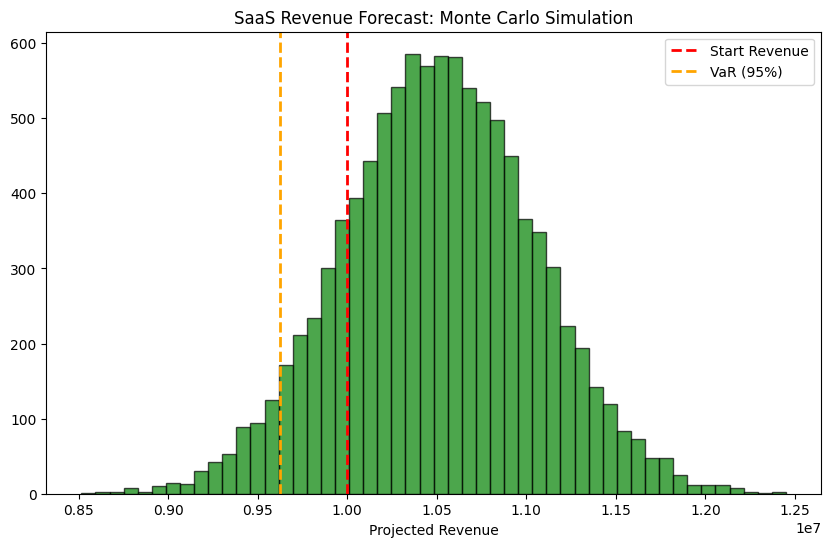

In [ ]:
def saas_risk_model(n_sims):
  base_rev = 10_000_000

  # Stochastic Inputs
  # Churn is centered at 10% but can vary (Standard Deviation 2%)
  churn_sims = np.random.normal(0.10, 0.02, n_sims)
  # Sales centered at $1.5M, varies by $500k
  sales_sims = np.random.normal(1_500_000, 500_000, n_sims)

  # The Transfers Function (The Business Logic)
  net_revenue = base_rev * (1-churn_sims) + sales_sims

  # Risk Metrics
  # Probability that we end the year with LESS money than we started
  prob_loss = np.mean(net_revenue < base_rev)

  # Value at Risk (95% Confidence)
  # We are 95% sure revenue ill be ABOVE this number (the 5th percentile)
  var_95 = np.percentile(net_revenue, 5)

  print(f"Probability of Revenue Decline: {prob_loss:.2%}")
  print(f"95% Value at Risk (Worst Case): ${var_95:,.2f}")

  # Visualization
  plt.figure(figsize=(10,6))
  plt.hist(net_revenue, bins=50, alpha=0.7, color='green', edgecolor='black')
  plt.axvline(base_rev, color='red', linestyle='dashed', linewidth=2, label='Start Revenue')
  plt.axvline(var_95, color='orange', linestyle='dashed', linewidth=2, label='VaR (95%)')
  plt.title('SaaS Revenue Forecast: Monte Carlo Simulation')
  plt.xlabel('Projected Revenue')
  plt.legend()
  plt.show()

saas_risk_model(10000)

5. Phase 4: Assessment - The "Fat Tail" Stress Test
Assignment: Risk Analyst for a Crypto Exchange
You are acting as a Risk Analyst. The standard model assumes asset prices follow a Normal Distribution (Bell Curve). However, history shows that markets have "Fat Tails" (extreme events, or "Black Swans," happen more often than the Bell Curve predicts).

📝 Your Task
Simulate: Run the SaaS Monte Carlo model from Module C, but replace the Normal Distribution for "New Sales" with a Student's t-distribution (which has heavier tails/more outliers).
Hint: Use np.random.standard_t(df=3, size=n_sims) and scale it to match the sales magnitude.
Compare: Calculate the VaR (5th percentile) for the Normal model vs. the Fat Tail model.
Analyze: Write a 200-word memo to the Chief Risk Officer explaining why the Fat Tail model suggests a higher capital reserve requirement.

Probability of Revenue Decline: 100.00%
95% Value at Risk (Worst Case): $8,676,123.79


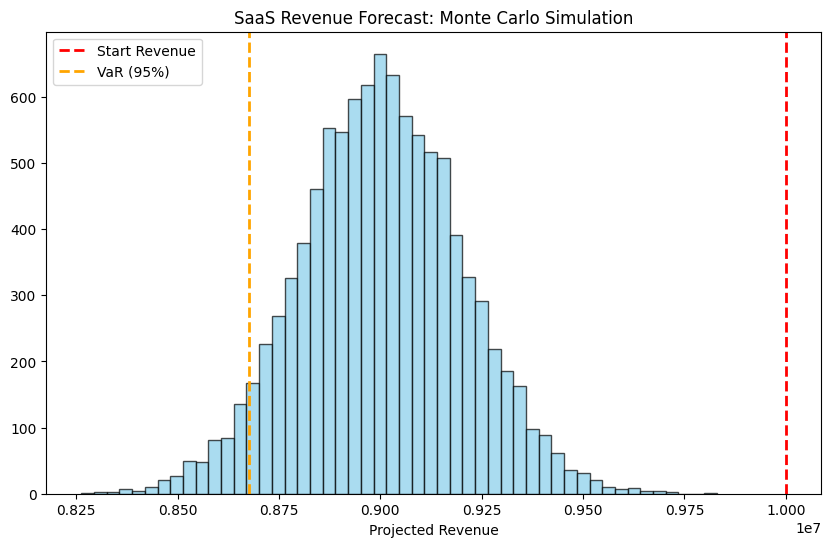

In [ ]:
def saas_risk_model(n_sims):
  base_rev = 10_000_000

  # Stochastic Inputs
  # Churn is centered at 10% but can vary (Standard Deviation 2%)
  churn_sims = np.random.normal(0.10, 0.02, n_sims)
  # Sales centered at $1.5M, varies by $500k
  sales_sims = np.random.standard_t(df=3, size=n_sims)

  # The Transfers Function (The Business Logic)
  net_revenue = base_rev * (1-churn_sims) + sales_sims

  # Risk Metrics
  # Probability that we end the year with LESS money than we started
  prob_loss = np.mean(net_revenue < base_rev)

  # Value at Risk (95% Confidence)
  # We are 95% sure revenue ill be ABOVE this number (the 5th percentile)
  var_95 = np.percentile(net_revenue, 5)

  print(f"Probability of Revenue Decline: {prob_loss:.2%}")
  print(f"95% Value at Risk (Worst Case): ${var_95:,.2f}")

  # Visualization
  plt.figure(figsize=(10,6))
  plt.hist(net_revenue, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
  plt.axvline(base_rev, color='red', linestyle='dashed', linewidth=2, label='Start Revenue')
  plt.axvline(var_95, color='orange', linestyle='dashed', linewidth=2, label='VaR (95%)')
  plt.title('SaaS Revenue Forecast: Monte Carlo Simulation')
  plt.xlabel('Projected Revenue')
  plt.legend()
  plt.show()

saas_risk_model(10000)